In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

**A)**

In [71]:
sigma_y = 0.1

In [72]:
part_D = True

In [73]:
x = np.random.multivariate_normal(
    mean = [0, 0],
    cov = np.eye(2),
    size = 20
)

if part_D:
    x = np.random.multivariate_normal(
    mean = [0, 0],
    cov = [[0.1, 0],
           [0, 1]],
    size = 20
)

x

array([[-0.00604544,  1.49892727],
       [ 0.18841107, -0.33495718],
       [-0.26065154, -0.76608573],
       [ 0.49559334, -0.30362778],
       [-0.43391949, -0.13755504],
       [-0.20533641,  0.53318464],
       [-0.51747973, -1.36014193],
       [-0.25487398,  0.99823658],
       [-0.19517303,  0.83763429],
       [-0.51608154,  0.78057969],
       [-0.30360627,  0.657701  ],
       [-0.207468  , -0.81038649],
       [ 0.46527114, -1.58572039],
       [ 0.18301128,  0.80020106],
       [-0.07259538, -0.18098094],
       [-0.21238378, -1.2056078 ],
       [-0.23751783, -1.0388928 ],
       [ 0.02619249, -1.0232505 ],
       [ 0.00744982,  2.69947765],
       [ 0.05263838, -0.16909134]])

In [74]:
theta = np.array([-1 , 1])

In [75]:
y = np.random.normal(
    loc = x @ theta.T,
    scale = sigma_y,
    size = 20
)
y

array([ 1.53570962, -0.45992036, -0.49359838, -0.72185171,  0.30117703,
        0.76248995, -0.78290505,  1.20041923,  0.93881039,  1.44477095,
        1.1477346 , -0.66799072, -2.00817753,  0.6721869 , -0.29121928,
       -1.07038567, -0.78584901, -0.96785997,  2.62685431, -0.3475883 ])

**B)**

In [76]:
mean = np.eye(2) @ x.T @ np.linalg.inv(sigma_y * np.eye(20) + x @ np.eye(2) @ x.T) @ y
mean

array([-0.96128385,  0.99309586])

In [77]:
var = np.eye(2) - np.eye(2) @ x.T @ np.linalg.inv(sigma_y * np.eye(20) + x @ np.eye(2) @ x.T) @ x @ np.eye(2)
var

array([[0.05531192, 0.00075837],
       [0.00075837, 0.00440192]])

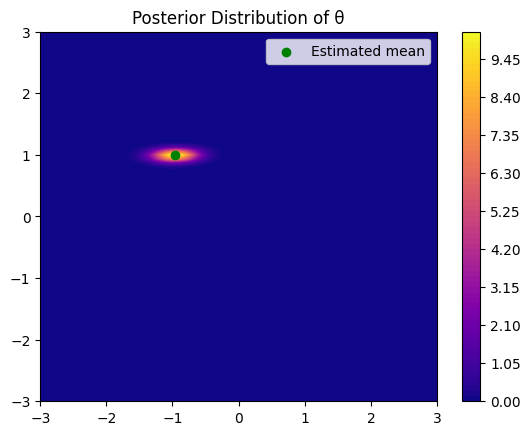

In [78]:
# Plot theta in range -3 to 3 for f(x) = x.T theta
theta0 = np.linspace(-3, 3, 100)
theta1 = np.linspace(-3, 3, 100)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
F = np.zeros(Theta0.shape)
for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        theta_ij = np.array([Theta0[i, j], Theta1[i, j]])
        F[i, j] = scipy.stats.multivariate_normal.pdf(
            theta_ij,
            mean=mean,
            cov=var
        )
plt.contourf(Theta0, Theta1, F, levels=100, cmap='plasma')
plt.colorbar()
plt.scatter(mean[0], mean[1], color='green', label='Estimated mean')
plt.title('Posterior Distribution of θ')
#plt.xlabel('θ0')
#plt.ylabel('θ1')
plt.legend()
plt.show()

**C)**

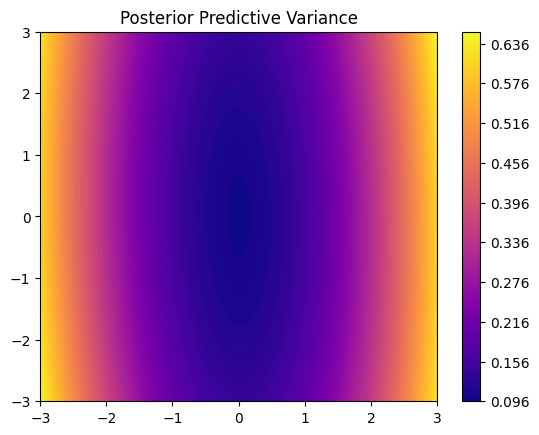

In [79]:
# plot posterior predictive cariance for x in range -3 to 3 ^2
x_test0 = np.linspace(-3, 3, 100)
x_test1 = np.linspace(-3, 3, 100)
X_test0, X_test1 = np.meshgrid(x_test0, x_test1)
PP_var = np.zeros(X_test0.shape)
for i in range(X_test0.shape[0]):
    for j in range(X_test0.shape[1]):
        x_test_ij = np.array([X_test0[i, j], X_test1[i, j]])
        PP_var[i, j] = sigma_y + x_test_ij.T @ var @ x_test_ij
plt.contourf(X_test0, X_test1, PP_var, levels=100, cmap='plasma')
plt.colorbar()
plt.title('Posterior Predictive Variance')
#plt.xlabel('x0')
#plt.ylabel('x1')
plt.show()  
